# Applying labs to our dataset
## Lab 1

In [1]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [2]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [3]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

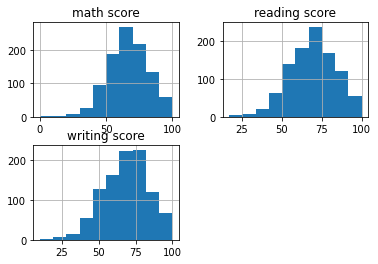

In [4]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

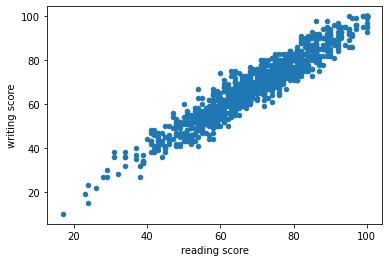

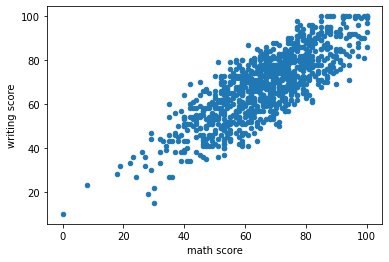

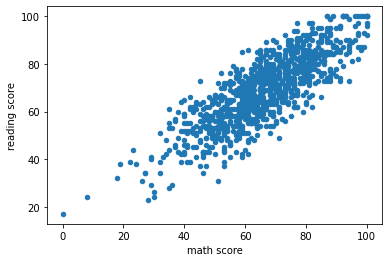

In [5]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Data Normalization & Factorization

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We need to factorize our categorical columns, so that all our data is numerical. 

In [7]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [8]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [9]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


### Splitting into train and test set and scaling

In [10]:
# Data where we keep the maths score numerical: 
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [11]:
# Data where we turn the maths score into categories of A, B, C, D, FAIL
# Discretize the data back into string format
def binFunction(row):
    if row["math score"] >= 70:
        return "A"
    elif row["math score"] >= 60:
        return "B"
    elif row["math score"] >= 50:
        return "C"
    elif row["math score"] >= 40:
        return "D"
    else:
        return "FAIL"
    
score_labels = ["F", "D", "C", "B", "A"]
exam_data_copy = df.copy()

# exam_data_copy["math score"] = pd.cut(exam_data_copy["math score"], bins = 5, labels=score_labels)

# data_categorical_target = exam_data_copy.apply(binFunction, axis=1)

# exam_data_copy

In [12]:
# Uncomment this if you want categorical data 

# X = exam_data_copy[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
# y = exam_data_copy[['math score']]

In [13]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [14]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

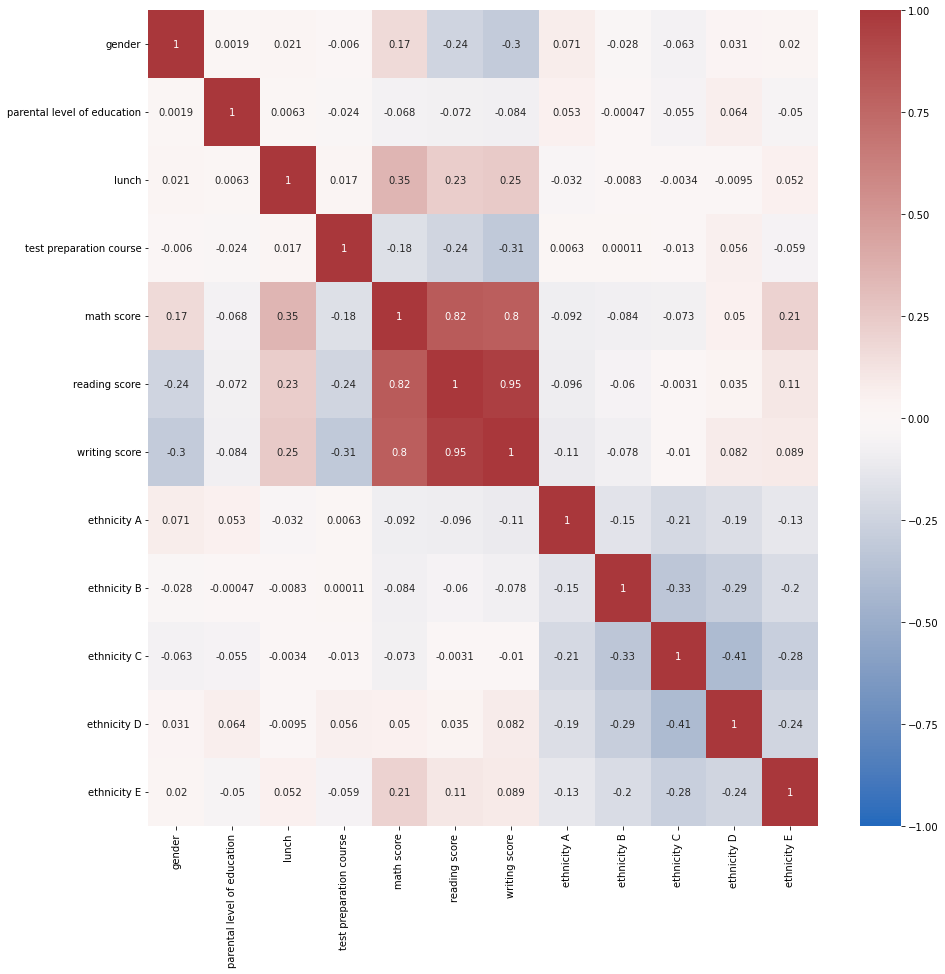

In [15]:
import seaborn as sns 

# Correlation Matrix: 
corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [16]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [17]:
data_top_correlation_features = df[['writing score', 'math score', 'gender']]

Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8642108438922504

Now let's see if there's a difference in accuracy when we only train with the top correlated features. Keep in mind that accuracy is not necessarily the best measure to evaluate a model. 

In [19]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_top_correlation_features, df[['math score']]
)

In [20]:
# 3 features. 
lr_three = LinearRegression() 
lr_three.fit(X_two_train, y_two_train)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_three.predict(X_two_test).squeeze()}
)
lr_three.score(X_two_test, y_two_test)

1.0

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [21]:
exam_data_copy['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [22]:
# Change to dataset where 'math score' is categorical. 

def binFunction(row):
    if row["math score"] >= 70:
        return 1
    else:
        return 0
    
data_categorical_target = df.copy().apply(binFunction, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_categorical_target)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [24]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = sgd_clf.predict(X_test)

In [25]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics ={}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))

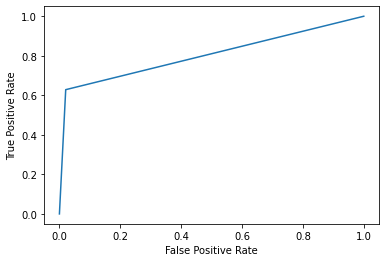

   accuracy  precision    recall  f1-score  roc-area
0     0.832   0.956522  0.628571  0.758621  0.803941


In [26]:
# Get metrics for SDG Classifier 
getMetrics(y_true, y_pred)

<AxesSubplot:>

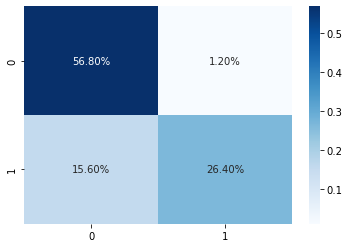

In [27]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5

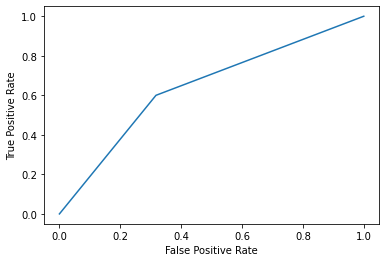

   accuracy  precision  recall  f1-score  roc-area
0     0.648   0.577982     0.6  0.588785  0.641379


In [119]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
getMetrics(y_test, multi_nom_y_pred)

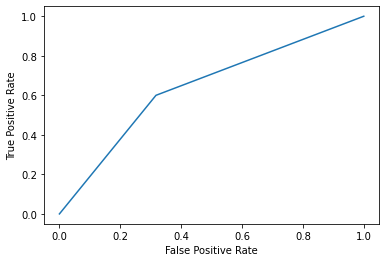

   accuracy  precision  recall  f1-score  roc-area
0     0.648   0.577982     0.6  0.588785  0.641379


In [118]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=1.0, fit_prior=False)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

getMetrics(y_test, clf_pred)

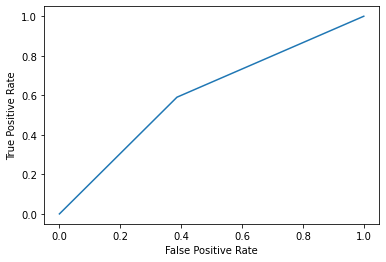

   accuracy  precision    recall  f1-score  roc-area
0     0.604   0.525424  0.590476  0.556054  0.602135


In [117]:
from sklearn.naive_bayes import CategoricalNB

cat_nb = CategoricalNB(alpha=1.0, fit_prior=False)
cat_nb.fit(X_train, y_train)
cat_nb_pred = cat_nb.predict(X_test)

getMetrics(y_test, cat_nb_pred)

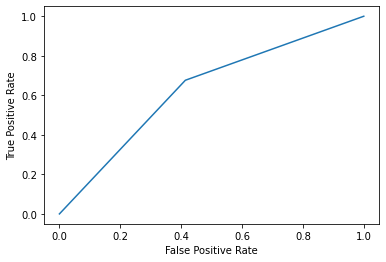

   accuracy  precision   recall  f1-score  roc-area
0     0.624   0.541985  0.67619  0.601695  0.631199


In [116]:
from sklearn.naive_bayes import BernoulliNB

benoulli_nb = BernoulliNB(alpha=1.0, fit_prior=False)
benoulli_nb.fit(X_train, y_train)
benoulli_nb_pred = benoulli_nb.predict(X_test)

getMetrics(y_test, benoulli_nb_pred)

In [35]:
!pip install pgmpy

In [37]:
from pgmpy.models import BayesianModel

In [139]:
bayesian_model = BayesianModel([("gender", "lunch"), ("lunch", "parental level of education"), ("parental level of education", "math score")])

In [142]:
bayesian_model.fit(data)

In [143]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bayesian_model)
q = infer.query(variables=["math score"],evidence={"gender": "male"})

C:\Users\jsnsw\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [155]:
values = q.values
len(values)

81

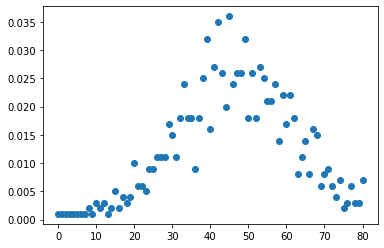

In [156]:
plt.scatter(range(0, 81), values)